# 0 - Introduction

In this section, I focus on four roles from the bronze dataset, combined with another raw dataset called job_skills.

The four roles are data analyst, data scientist, data engineer, and software engineer. In the following analysis, I will examine the skills required for these roles and their overall distribution. The goal is to provide insights into what candidates should prepare for and how they can adjust their job search strategies.

# 1 - Import & paths

In [18]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from collections import Counter

ROOT = Path("..")
DATA = ROOT / "data"
SILVER = DATA / "silver" / "jobs_text.parquet"
GOLD = DATA / "gold" / "role_skills_by_title.parquet"

pd.set_option("display.max_colwidth", None)

# 2 - Overview all datas and check null value

In [2]:
silver = pd.read_parquet(SILVER)
silver.head()

,title_lc,company,location,seniority,work_type,posted_at,skills_list,text
0,"medical device safety data analyst -whippany, nj",Bayer,"Whippany, NJ",Mid senior,Onsite,2024-01-13,"[data analysis strategies, spotfire, gxp systems, system specifications, user requirements specifications, user acceptance test scripts, meddra coding, dsur, pv database retrieval strategies, data pipeline, data analysis, pbrer, fda, queries, presentations, databases, pharmacovigilance, ema, project management, sql, excel, dpsur, english, signal detection and management system, medical classification systems]","medical device safety data analyst -whippany, nj data analysis strategies spotfire gxp systems system specifications user requirements specifications user acceptance test scripts meddra coding dsur pv database retrieval strategies data pipeline data analysis pbrer fda queries presentations databases pharmacovigilance ema project management sql excel dpsur english signal detection and management system medical classification systems"
1,lead data engineer,Lennar,"Miami, FL",Mid senior,Onsite,2024-01-13,"[data quality engineer, dataops, dbt, rest apis, prefect, problem solving, analytical thinking, collaboration, ability to learn new technologies, data analytics, qlik, software testing, data validation, hasura, attention to detail, snowflake, strong work ethic, graphql, data pipelines, data quality testing, database replication tools, automation, fivetran, data vault, team player, agile, communication, data platform engineering]",lead data engineer data quality engineer dataops dbt rest apis prefect problem solving analytical thinking collaboration ability to learn new technologies data analytics qlik software testing data validation hasura attention to detail snowflake strong work ethic graphql data pipelines data quality testing database replication tools automation fivetran data vault team player agile communication data platform engineering
2,gcp data engineer,Prime Vector Consulting Services LLC,"Woonsocket, RI",Mid senior,Onsite,2024-01-13,"[martech, gcp, woonsocket ri, data engineer, cloud, adtech, data integration pipelines]",gcp data engineer martech gcp woonsocket ri data engineer cloud adtech data integration pipelines
3,data engineer,Skiltrek,"Phoenix, AZ",Mid senior,Onsite,2024-01-13,"[numpy, shell scripting, rdbms, nosql, redshift, python, unix, linux, tableau, pandas, unit testing, rds, data engineering, snowflake, dask, quick sight, sql alchemy, programming, data warehousing, aws, agile, postgresql]",data engineer numpy shell scripting rdbms nosql redshift python unix linux tableau pandas unit testing rds data engineering snowflake dask quick sight sql alchemy programming data warehousing aws agile postgresql
4,market research data analyst melville ny ref,Executive Staff Recruiters / ESR Healthcare,"Melville, NC",Mid senior,Onsite,2024-01-12,"[python, survey design, analytical skills, data analysis, videography, critical thinking, sql, photography, market research, statistics, presentation skills, project management, business acumen, tableau, ms excel, bi tools, data mining, data visualization]",market research data analyst melville ny ref python survey design analytical skills data analysis videography critical thinking sql photography market research statistics presentation skills project management business acumen tableau ms excel bi tools data mining data visualization


In [19]:
gold = pd.read_parquet(GOLD)
gold.head()

,title_lc,skills_for_role
0,"software engineer iii - aris, python, business process modeling","[agile methodologies, applicant resiliency, application development, aris designer/architect, aris platform configuration, artificial intelligence, ci/cd, cloud, java, machine learning, mobile, object customization, operational stability, python, security, software ag aris products, software development life cycle, software engineering, system design, testing]"
1,"senior deep learning software engineer, algorithmic model optimization","[algorithmic model optimization, c++, collaboration, compilation stack, costeffective computing, cuda, datadriven approach, deep learning, diffusion models, distillation, generative models, gpu architecture, hardware design, jax, large language models (llm), machine learning frameworks, performance tuning, pruning, python, pytorch, quantization, realtime computing, software development, tensorrt]"
2,bioinformatician / data scientist / computational biologist,"[aws, bash, bioinformatics, biological databases, cellular biology, cloud computing, collaborative spirit, communication skills, data analysis, data integration, data processing, deep learning, english, enthusiastic, highperformance computing, industry experience, interpersonal skills, java, machine learning, molecular biology, ms, omics data, organizational skills, oxford nanopore, pacbio, phd, presentation skills, problemsolving mindset, python, r/bioconductor, sql, statistical analysis, statistics, team working ability, unix, visualization, web tools, webbased deployment]"
3,software engineer (c# / o365),"[3rd party api integration, agile development, asynchronous programming, automation test development, c#, cloudbased infrastructure, collaboration skills, compliance, cpu analysis, crossfunctional collaboration, data analytics, data collection, data protection, data security, data transfer, design patterns, effective communication, fast technology adaptation, highperformance computing, kernel modules, memory analysis, microsoft api (graph rest csom), microsoft azure cloud, multidisciplinary teamwork, multitasking, multithreaded programming, network analysis, objectoriented programming, reusable code, scrum, software development, software performance optimization, source control (tfs git), sql, testable code, threat detection, user space crawlers]"
4,"staff, software engineer","[2 years software engineering experience, 4 years software engineering experience, 4+ years of experience in software engineering or related field, 401(k) match, accountability, accuracy, activemq, adaptability, adls, agile, agile development, agile development methodology, agile methodologies, agile team collaboration, algorithms, analytical mindset, analytical skills, analytical thinking, android, angular, api, apis, appium, ar/vr, architectural design, architecture, architecture framework, artificial intelligence, assetj, attention to detail, automation, automation testing, automation toolset, automation/robotics, aws, azure, azure cloud, bachelor's degree, bachelor's degree in computer science, bachelor's degree in computer science or related field, bachelor's in computer science, background processing, backup and recovery, balancing conflicting interests, best practices, big data, big data analysis, blog posts, build and deployment processes, build systems: maven gradle, business intelligence, business requirements, business skills, c++, cassandra, ci/cd, ci/cd pipelines, cloud, cloud application development, cloud computing, cloud data strategy, cloud native application development, cloud platforms: google cloud platform azure, cloud stacks, cloud systems, cloud technologies, cloud technologies: azure google cloud platform, cncf tools, code quality improvement, code reviews, code samples, codeinjection technologies, collaboration, collaborative team player, communication, communication and collaboration, communication skills, compensation package, computer engineer

In [20]:
silver_null_sum = silver.isnull().sum()
gold_null_sum = gold.isnull().sum()

print(f"Silver Null: {silver_null_sum}")
print("-------------------------------")
print(f"Gold Null: {gold_null_sum}")

Silver Null: title_lc       0
company        0
location       0
seniority      0
work_type      0
posted_at      0
skills_list    0
text           0
dtype: int64
-------------------------------
Gold Null: title_lc           0
skills_for_role    0
dtype: int64


# 3 - Role distribution in overall job market

                role  count  percentage
0     data scientist    878    6.542474
1       data analyst   1943   14.478390
2      data engineer   1523   11.348733
3  software engineer   9119   67.950820


/var/folders/pf/h7_448690wbc1y9r5lpp7vv80000gn/T/ipykernel_60067/3389853231.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cnt = silver["title_lc"].str.contains(pattern, regex=True, na=False).sum()


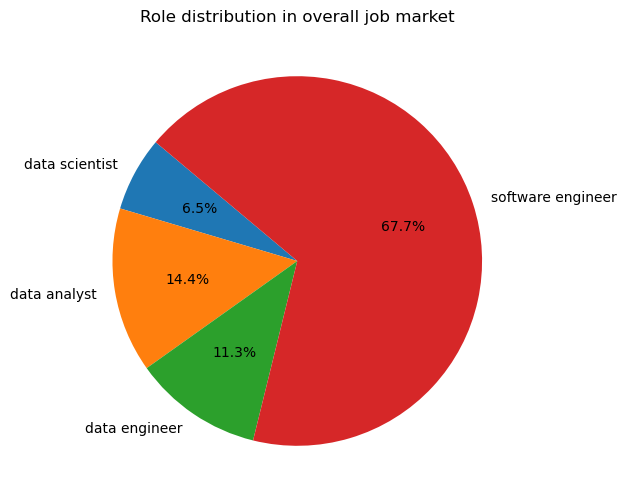

In [6]:
ROLE_PATTERNS = {
    "data scientist": r"\b(data scientist|scientist)\b",
    "data analyst": r"\b(data analyst|analyst)\b",
    "data engineer": r"\bdata engineer\b",
    "software engineer": r"\bsoftware engineer\b",
}

role_counts = {}
for role, pattern in ROLE_PATTERNS.items():
    cnt = silver["title_lc"].str.contains(pattern, regex=True, na=False).sum()
    role_counts[role] = cnt

#
role_df = pd.DataFrame(list(role_counts.items()), columns=["role", "count"])
role_df["percentage"] = role_df["count"] / len(silver) * 100
print(role_df)

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(role_df["count"], labels=role_df["role"], autopct="%1.1f%%", startangle=140)
plt.title("Role distribution in overall job market")
plt.show()

# 4 - Top 20 Skills across all roles (DA + DS + DE + SWE)

                    skill  count
65                 python   6322
19                    sql   5032
117                  java   4411
78                    aws   3455
107  software engineering   3153
98             kubernetes   2350
109                docker   2321
129            javascript   2272
10          data analysis   2195
50                  agile   2173
51          communication   2115
116  software development   1969
115      machine learning   1966
120                   c++   1779
128       cloud computing   1718
92     data visualization   1631
103                    go   1512
67                  linux   1489
217            typescript   1437
93                    git   1369


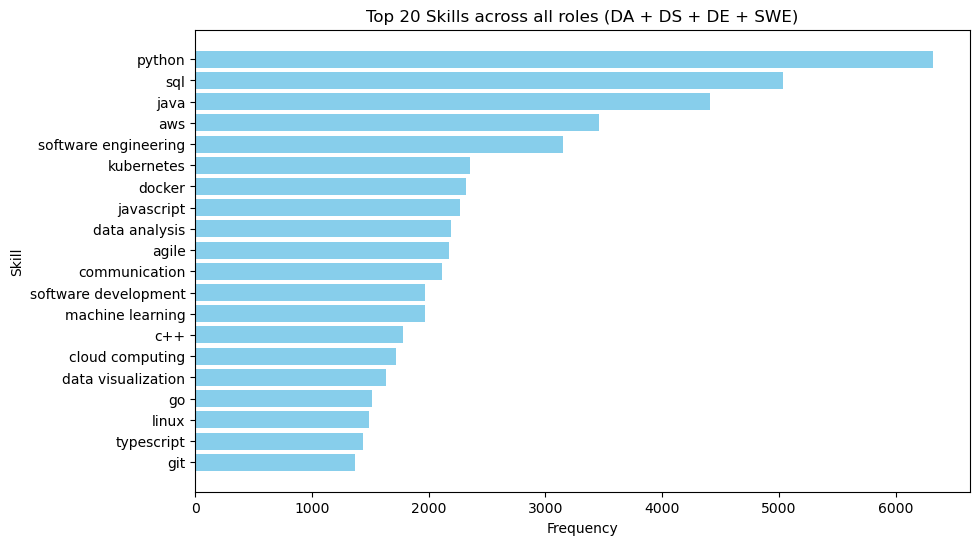

In [9]:
# 1. Get skills from dataset
all_skills = [skill for skills in silver["skills_list"].dropna() for skill in skills]

# 2. Count skills
skill_counts = Counter(all_skills)

# 3. Turn into dataframe and show top 20 skills
skill_df = pd.DataFrame(skill_counts.items(), columns=["skill", "count"]).sort_values(
    "count", ascending=False
)
print(skill_df.head(20))

# 4. Make bar chart
plt.figure(figsize=(10, 6))
plt.barh(skill_df.head(20)["skill"], skill_df.head(20)["count"], color="skyblue")
plt.gca().invert_yaxis()
plt.title("Top 20 Skills across all roles (DA + DS + DE + SWE)")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.show()

# 5 - Top 20 Skills (Normalized across DA/DS/DE/SWE)

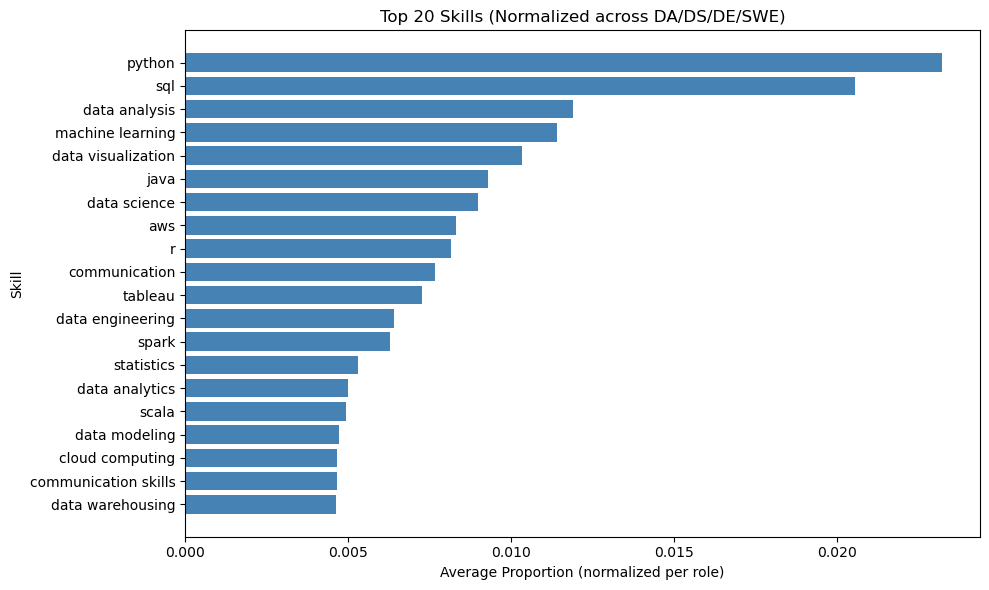

In [ ]:
# 1. Normalize within role
role_skill_props = []
for role, pattern in ROLE_PATTERNS.items():
    mask = silver["title_lc"].notna() & silver["title_lc"].str.contains(
        pattern, regex=True
    )
    role_df = silver.loc[mask]

    all_skills = [
        skill for skills in role_df["skills_list"].dropna() for skill in skills
    ]
    skill_counts = Counter(all_skills)
    total = sum(skill_counts.values())
    skill_df = pd.DataFrame(skill_counts.items(), columns=["skill", "count"])
    skill_df["proportion"] = skill_df["count"] / total
    skill_df.insert(0, "role", role)
    role_skill_props.append(skill_df)

role_skill_df = pd.concat(role_skill_props, ignore_index=True)

# 2. Weighted
avg_skill_df = (
    role_skill_df.groupby("skill")["proportion"]
    .mean()
    .reset_index()
    .sort_values("proportion", ascending=False)
)

# 3. Get top 20 skills
N = 20
top_avg_skills = avg_skill_df.head(N)

# 4. Draw bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_avg_skills["skill"], top_avg_skills["proportion"], color="steelblue")
plt.gca().invert_yaxis()
plt.title(f"Top {N} Skills (Normalized across DA/DS/DE/SWE)")
plt.xlabel("Average Proportion (normalized per role)")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()

# 6 - Top Skills by Role (DA / DS / DE / SWE)

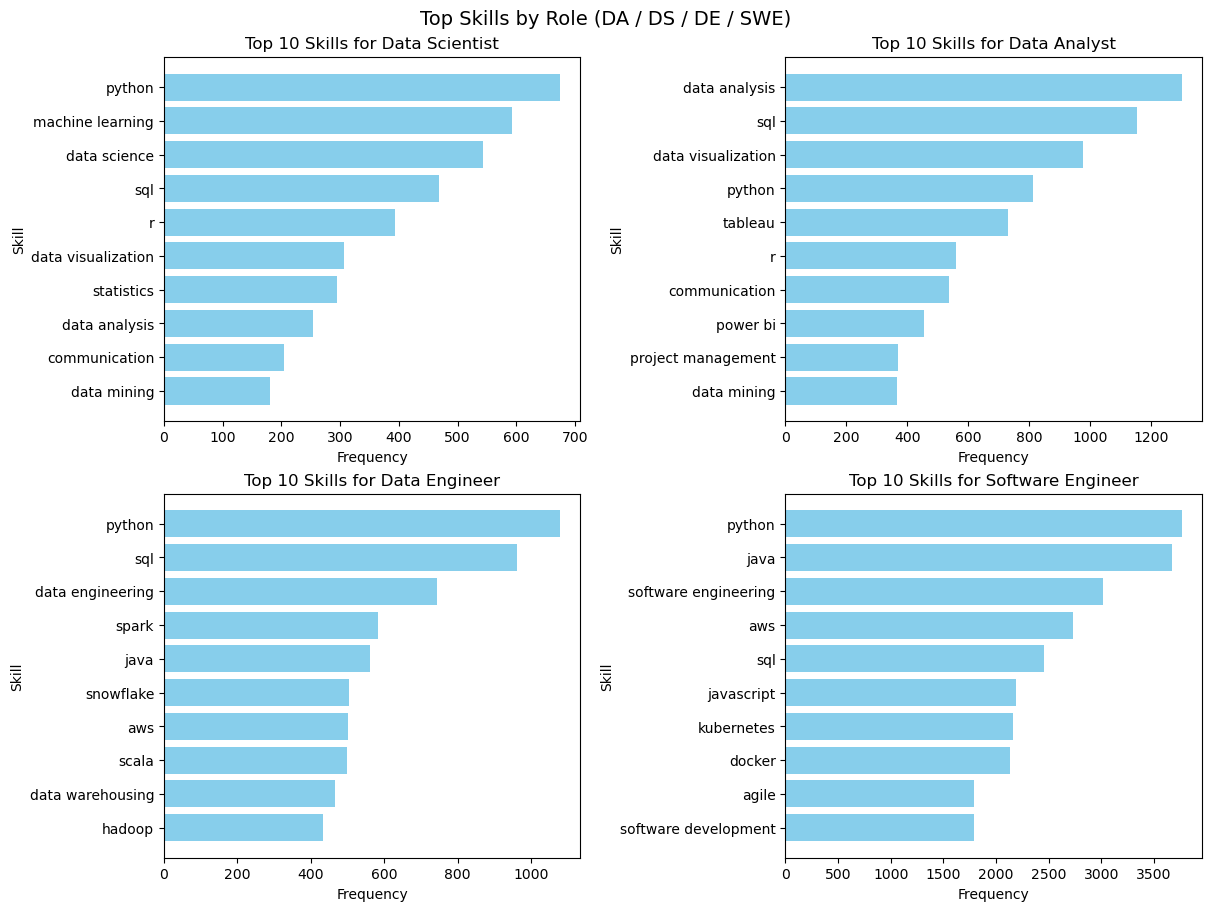

In [25]:
def top_skills_for_role(df, role, regex_pat, k=10):
    # Select skills from roles
    mask = df["title_lc"].notna() & df["title_lc"].str.contains(regex_pat, regex=True)
    role_df = df.loc[mask]

    all_skills = [
        skill for skills in role_df["skills_list"].dropna() for skill in skills
    ]

    skill_counts = Counter(all_skills)
    skill_df = (
        pd.DataFrame(skill_counts.items(), columns=["skill", "count"])
        .sort_values("count", ascending=False)
        .head(k)
    )

    skill_df.insert(0, "role", role)
    return skill_df


# Get top 10 skills from DA, DS, DE, SWE
tables = [
    top_skills_for_role(silver, role, pat, k=10) for role, pat in ROLE_PATTERNS.items()
]
skills_by_role = pd.concat(tables, ignore_index=True)


# Draw subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 9), constrained_layout=True)
axes = axes.ravel()

for ax, role in zip(axes, ROLE_PATTERNS.keys()):
    sub = skills_by_role[skills_by_role["role"] == role]
    ax.barh(sub["skill"], sub["count"], color="skyblue")
    ax.invert_yaxis()
    ax.set_title(f"Top 10 Skills for {role.title()}")
    ax.set_xlabel("Frequency")
    ax.set_ylabel("Skill")

fig.suptitle("Top Skills by Role (DA / DS / DE / SWE)", fontsize=14)
plt.show()

# 7 - Top 20 Regions for DA, DS, DE, SWE (US states + countries)

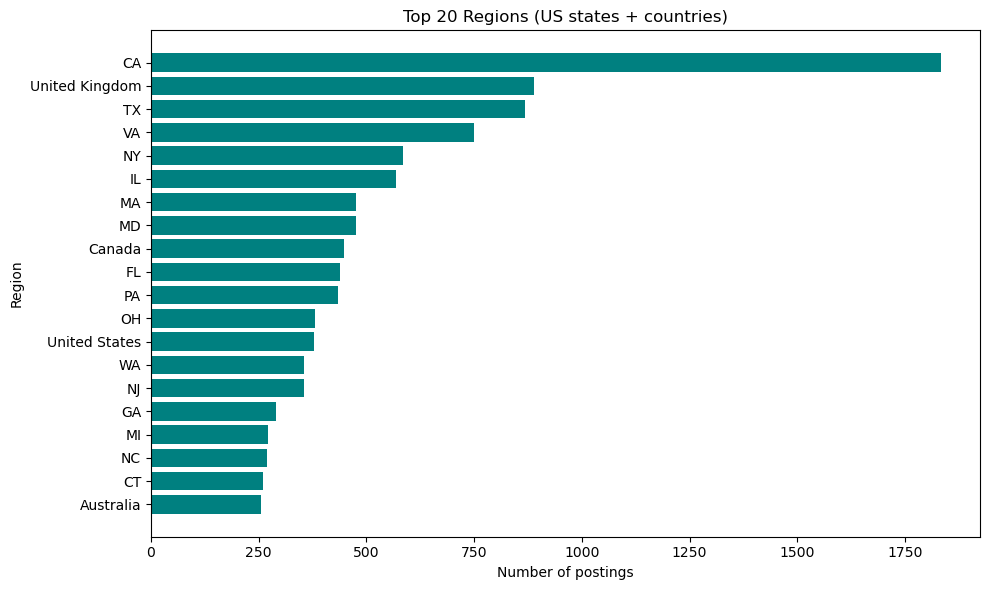

In [55]:
# Parse States or Countries
def parse_location(loc):
    if pd.isna(loc):
        return "NA"
    parts = [p.strip() for p in loc.split(",")]
    if len(parts[-1]) == 2 and parts[-1].isalpha():
        return parts[-1]  # (e.g., CA, NY)
    else:
        return parts[-1]  # (e.g., United Kingdom, Canada)


# Count top 20 regions
silver["region"] = silver["location"].apply(parse_location)
region_counts = silver["region"].value_counts().head(20)

# Draw plots
plt.figure(figsize=(10, 6))
bars = plt.barh(region_counts.index, region_counts.values, color="teal")
plt.gca().invert_yaxis()
plt.title("Top 20 Regions (US states + countries)")
plt.xlabel("Number of postings")
plt.ylabel("Region")
plt.tight_layout()
plt.show()